In [10]:
import sys
sys.path.append('./../../designer/script/')
from gets.get_spectrum import get_spectrum_simple
from design import DesignSimple
from film import FilmSimple
from spectrum import SpectrumSimple
from utils.plot_spectrum import plot_spectrum
from utils.load_designs import init_film_single_spec
from utils.plot_spectrum import plot_spectrum
from utils.load_designs import load_designs_single_spec as load_designs
from utils.sort import sort_by_ith_list

import numpy as np
import matplotlib.pyplot as plt

# Initialize: config for TML
WLS = np.linspace(500, 1000, 500)
INC_ANG = 60.
wl = 750. # wl used for calculating OT

def plot_film(f: FilmSimple):
    spec = f.get_spec()
    spec.calculate() # compile cuda kernel func
    plot_spectrum(spec)

np.random.seed(1)
f_target_30layers = FilmSimple("SiO2", "TiO2", "SiO2", np.random.random(30) * 100) # target film for TML
f_target_30layers.add_spec_param(INC_ANG, WLS)

np.random.seed(1)
f_target_4layers = FilmSimple("SiO2", "TiO2", "SiO2", np.random.random(4) * 750) # target film for TML
f_target_4layers.add_spec_param(INC_ANG, WLS)

In [11]:
# Load trained films data and construct Design objects
runs_dict = {
            "SiO2_30layers": {},
            "TiO2_30layers": {},
            "SiO2_4layers": {},
            "TiO2_4layers": {}    
            }
runs_dict['SiO2_30layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_SiO2_target30layers/'
runs_dict['TiO2_30layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_TiO2_target30layers/'
runs_dict['SiO2_4layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_SiO2_target4layers/'
runs_dict['TiO2_4layers']['file_dir'] = './../raw_design_result/50iters_0to2OT_200run_TiO2_target4layers/'

runs_dict['SiO2_30layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_SiO2_target30layers/'
runs_dict['TiO2_30layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_TiO2_target30layers/'
runs_dict['SiO2_4layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_SiO2_target4layers/'
runs_dict['TiO2_4layers']['save_fig_dir'] = './figs/50iters_0to2OT_200run_TiO2_target4layers/'


runs_dict['SiO2_30layers']['designs'] = load_designs(runs_dict['SiO2_30layers']['file_dir'], f_target_30layers, n_A='SiO2', n_B='TiO2', n_sub='SiO2')
runs_dict['TiO2_30layers']['designs'] = load_designs(runs_dict['TiO2_30layers']['file_dir'], f_target_30layers, n_A='TiO2', n_B='SiO2', n_sub='SiO2')
runs_dict['SiO2_4layers']['designs'] = load_designs(runs_dict['SiO2_4layers']['file_dir'], f_target_4layers, n_A='SiO2', n_B='TiO2', n_sub='SiO2')
runs_dict['TiO2_4layers']['designs'] = load_designs(runs_dict['TiO2_4layers']['file_dir'], f_target_4layers, n_A='TiO2', n_B='SiO2', n_sub='SiO2')

Trained film should not have zero geometric thickness (run 0)
Trained film should not have zero geometric thickness (run 0)
Trained film should not have zero geometric thickness (run 0)
Trained film should not have zero geometric thickness (run 0)


In [29]:
def plot_layer_thickness(film: FilmSimple):
    # wl: middle wl of the first spec
    d = film.get_d()
    spec = film.get_all_spec_list()[0]
    n_A = spec.n[spec.WLS.shape[0] // 2, 0]
    n_B = spec.n[spec.WLS.shape[0] // 2, 1]
    n_arr = [n_A, n_B]
    
    fig, ax = plt.subplots(1, 1)
    cur_d = 0
    for i in range(d.shape[0]):
        this_n = n_arr[i % 2]
        last_n = n_arr[(i - 1) % 2]
        ax.plot([cur_d, cur_d + d[i]], [this_n, this_n], color='steelblue')
        if i != 0:
            ax.plot([cur_d, cur_d], [this_n, last_n], c='steelblue')
        cur_d += d[i]
    
    # ax.set_xlim(0, 20000)
    ax.set_xlabel('position / nm')
    ax.set_title(f'refractive index distribution at {spec.WLS[spec.WLS.shape[0] // 2]: .0f} nm')
    fig.set_size_inches(6, 1)
    return ax, fig


[3.12766504e+02 5.40243370e+02 8.57811130e-02 2.26749429e+02]


c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


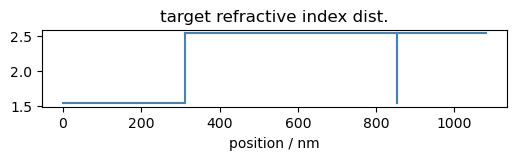

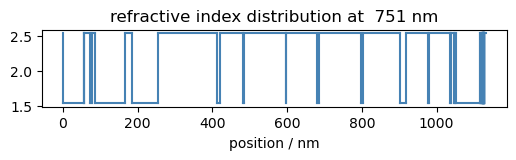

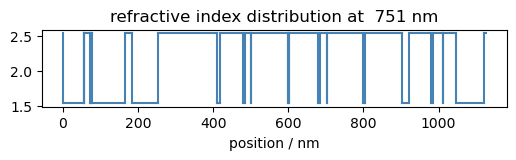

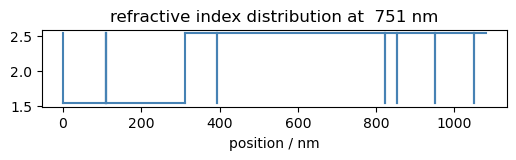

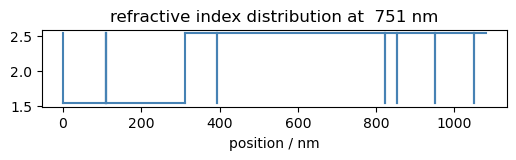

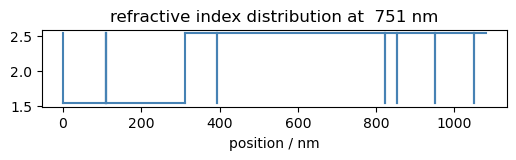

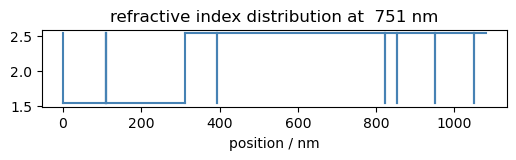

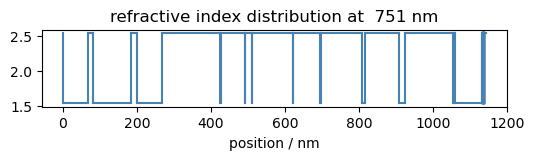

In [31]:
# 4 layers, same strcuture with the target!!!
def generate_target_f():
    WLS = np.linspace(500, 1000, 500)
    INC_ANG = 60.
    layer_number = 4
    np.random.seed(1)
    d = np.random.random(layer_number) * 3000 / layer_number
    print(d)
    f = FilmSimple('SiO2', 'TiO2', 'SiO2', d)
    f.add_spec_param(INC_ANG, WLS)
    f.calculate_spectrum()
    spec = f.get_spec().get_R()
    return f

ax, fig = plot_layer_thickness(generate_target_f())
ax.set_title('target refractive index dist.')

for i in range(87, 94):
    plot_layer_thickness(runs_dict['TiO2_4layers']['designs'][i].film)